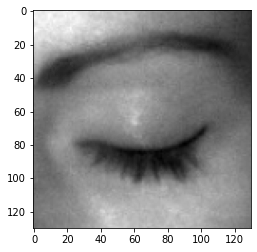

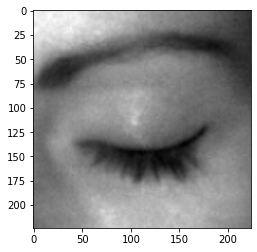

In [21]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

img_array = cv2.imread("train/open_eyes/s0001_02334_0_0_1_0_0_01.png",cv2.IMREAD_GRAYSCALE)
plt.imshow(img_array,cmap="gray")

img_array.shape

#Classes
Datadirectory = "train/"  #Training Dataset
Classes = ["close_eyes","open_eyes"] # List of Classes
for category in Classes:
  path = os.path.join(Datadirectory, category)
  for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
    backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
    plt.imshow(img_array, cmap="gray")
    plt.show()
    break
  break

img_array.shape

img_size = 224
new_array = cv2.resize(img_array,(img_size,img_size))
plt.imshow(new_array,cmap="gray")
plt.show()



In [22]:
# reading all the images and converting them into an array for data and labels

training_Data = []

def create_training_data():
  for category in Classes:
    path = os.path.join(Datadirectory,category)
    classnum = Classes.index(category)
    for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
                new_array = cv2.resize(backtorgb, (img_size,img_size))
                training_Data.append([new_array,classnum])
            except Exception as e:
                pass

create_training_data()
print(len(training_Data))


2807


In [23]:
import random
random.shuffle(training_Data)

X=[]
y=[]

for features,label in training_Data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1,img_size, img_size,3)

X.shape


(2807, 224, 224, 3)

In [24]:
# Normalize the Data

X = X/255.0

Y= np.array(y)


In [25]:
# deep learning model for training - Transfer Learning

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

model = tf.keras.applications.mobilenet.MobileNet()

model.summary()




17235968/17225924 [==============================] - 0s 0us/step
Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32

In [26]:
# Transfer Learning

base_input = model.layers[0].input  # input
base_output = model.layers[-4].output

Flat_layer = layers.Flatten()(base_output)
final_output = layers.Dense(1)(Flat_layer)
final_ouput = layers.Activation('sigmoid')(final_output)

new_model = keras.Model(inputs = base_input, outputs = final_output)
new_model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                      

In [27]:
# binary classification

new_model.compile(loss="binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])
new_model.fit(X,Y, epochs = 20, validation_split = 0.1)


Epoch 1/20
79/79 [==============================] - 461s 6s/step - loss: 0.6007 - accuracy: 0.9568 - val_loss: 1.3831 - val_accuracy: 0.9039
Epoch 2/20
79/79 [==============================] - 455s 6s/step - loss: 0.5185 - accuracy: 0.9652 - val_loss: 7.2816 - val_accuracy: 0.5196
Epoch 3/20
79/79 [==============================] - 457s 6s/step - loss: 0.1349 - accuracy: 0.9905 - val_loss: 1.2780 - val_accuracy: 0.8754
Epoch 4/20
79/79 [==============================] - 467s 6s/step - loss: 0.2556 - accuracy: 0.9830 - val_loss: 7.5276 - val_accuracy: 0.5089
Epoch 5/20
79/79 [==============================] - 467s 6s/step - loss: 0.4713 - accuracy: 0.9663 - val_loss: 0.0549 - val_accuracy: 0.9964
Epoch 6/20
79/79 [==============================] - 466s 6s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/20
79/79 [==============================] - 469s 6s/step - loss: 0.0121 - accuracy: 0.9992 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
E

In [28]:
new_model.save("my_model2.h5")
new_model.save("model/2")


INFO:tensorflow:Assets written to: model/2/assets


In [29]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

img_size = 224
new_model = tf.keras.models.load_model("my_model2.h5")

array([[84.19454]], dtype=float32)

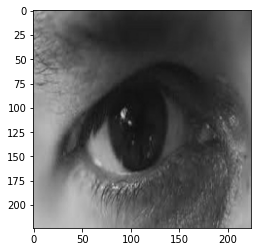

In [30]:
img_array = cv2.imread("test/open/_16.jpg", cv2.IMREAD_GRAYSCALE)
backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
new_array = cv2.resize(backtorgb, (img_size,img_size))

X_input = np.array(new_array).reshape(1, img_size, img_size, 3)

X_input.shape

plt.imshow(new_array)

X_input = X_input/255.0

prediction = new_model.predict(X_input)

prediction

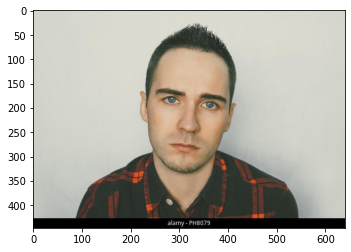

In [31]:
img = cv2.imread('sadopen2.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

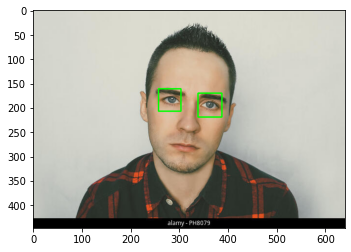

In [32]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_forntalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
eyes = eye_cascade.detectMultiScale(gray,1.1,4)
for(x,y,w,h) in eyes:
    cv2.rectangle(img, (x,y), (x+w, y+h), (0,255,0),2)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))


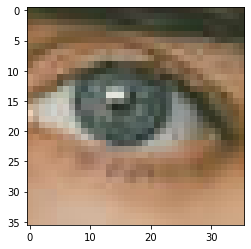

In [33]:
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    #print(faceCascade.empty())
eyes = eye_cascade.detectMultiScale(gray,1.1,4)
for x,y,w,h in eyes:
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyess = eye_cascade.detectMultiScale(roi_gray)
    if len(eyess) == 0:
        print("eyes are not detected")
    else:
        for (ex,ey,ew,eh) in eyess:
            eyes_roi = roi_color[ey: ey+eh, ex:ex+ew]

plt.imshow(cv2.cvtColor(eyes_roi, cv2.COLOR_BGR2RGB))

In [34]:
eyes_roi.shape

final_image = cv2.resize(eyes_roi, (224,224))
final_image = np.expand_dims(final_image,axis = 0)
final_image = final_image/255.0

new_model.predict(final_image)

array([[16.46328]], dtype=float32)